In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [74]:
cdata=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/company%20data.csv")
cdata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [75]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [76]:
cdata.shape

(400, 11)

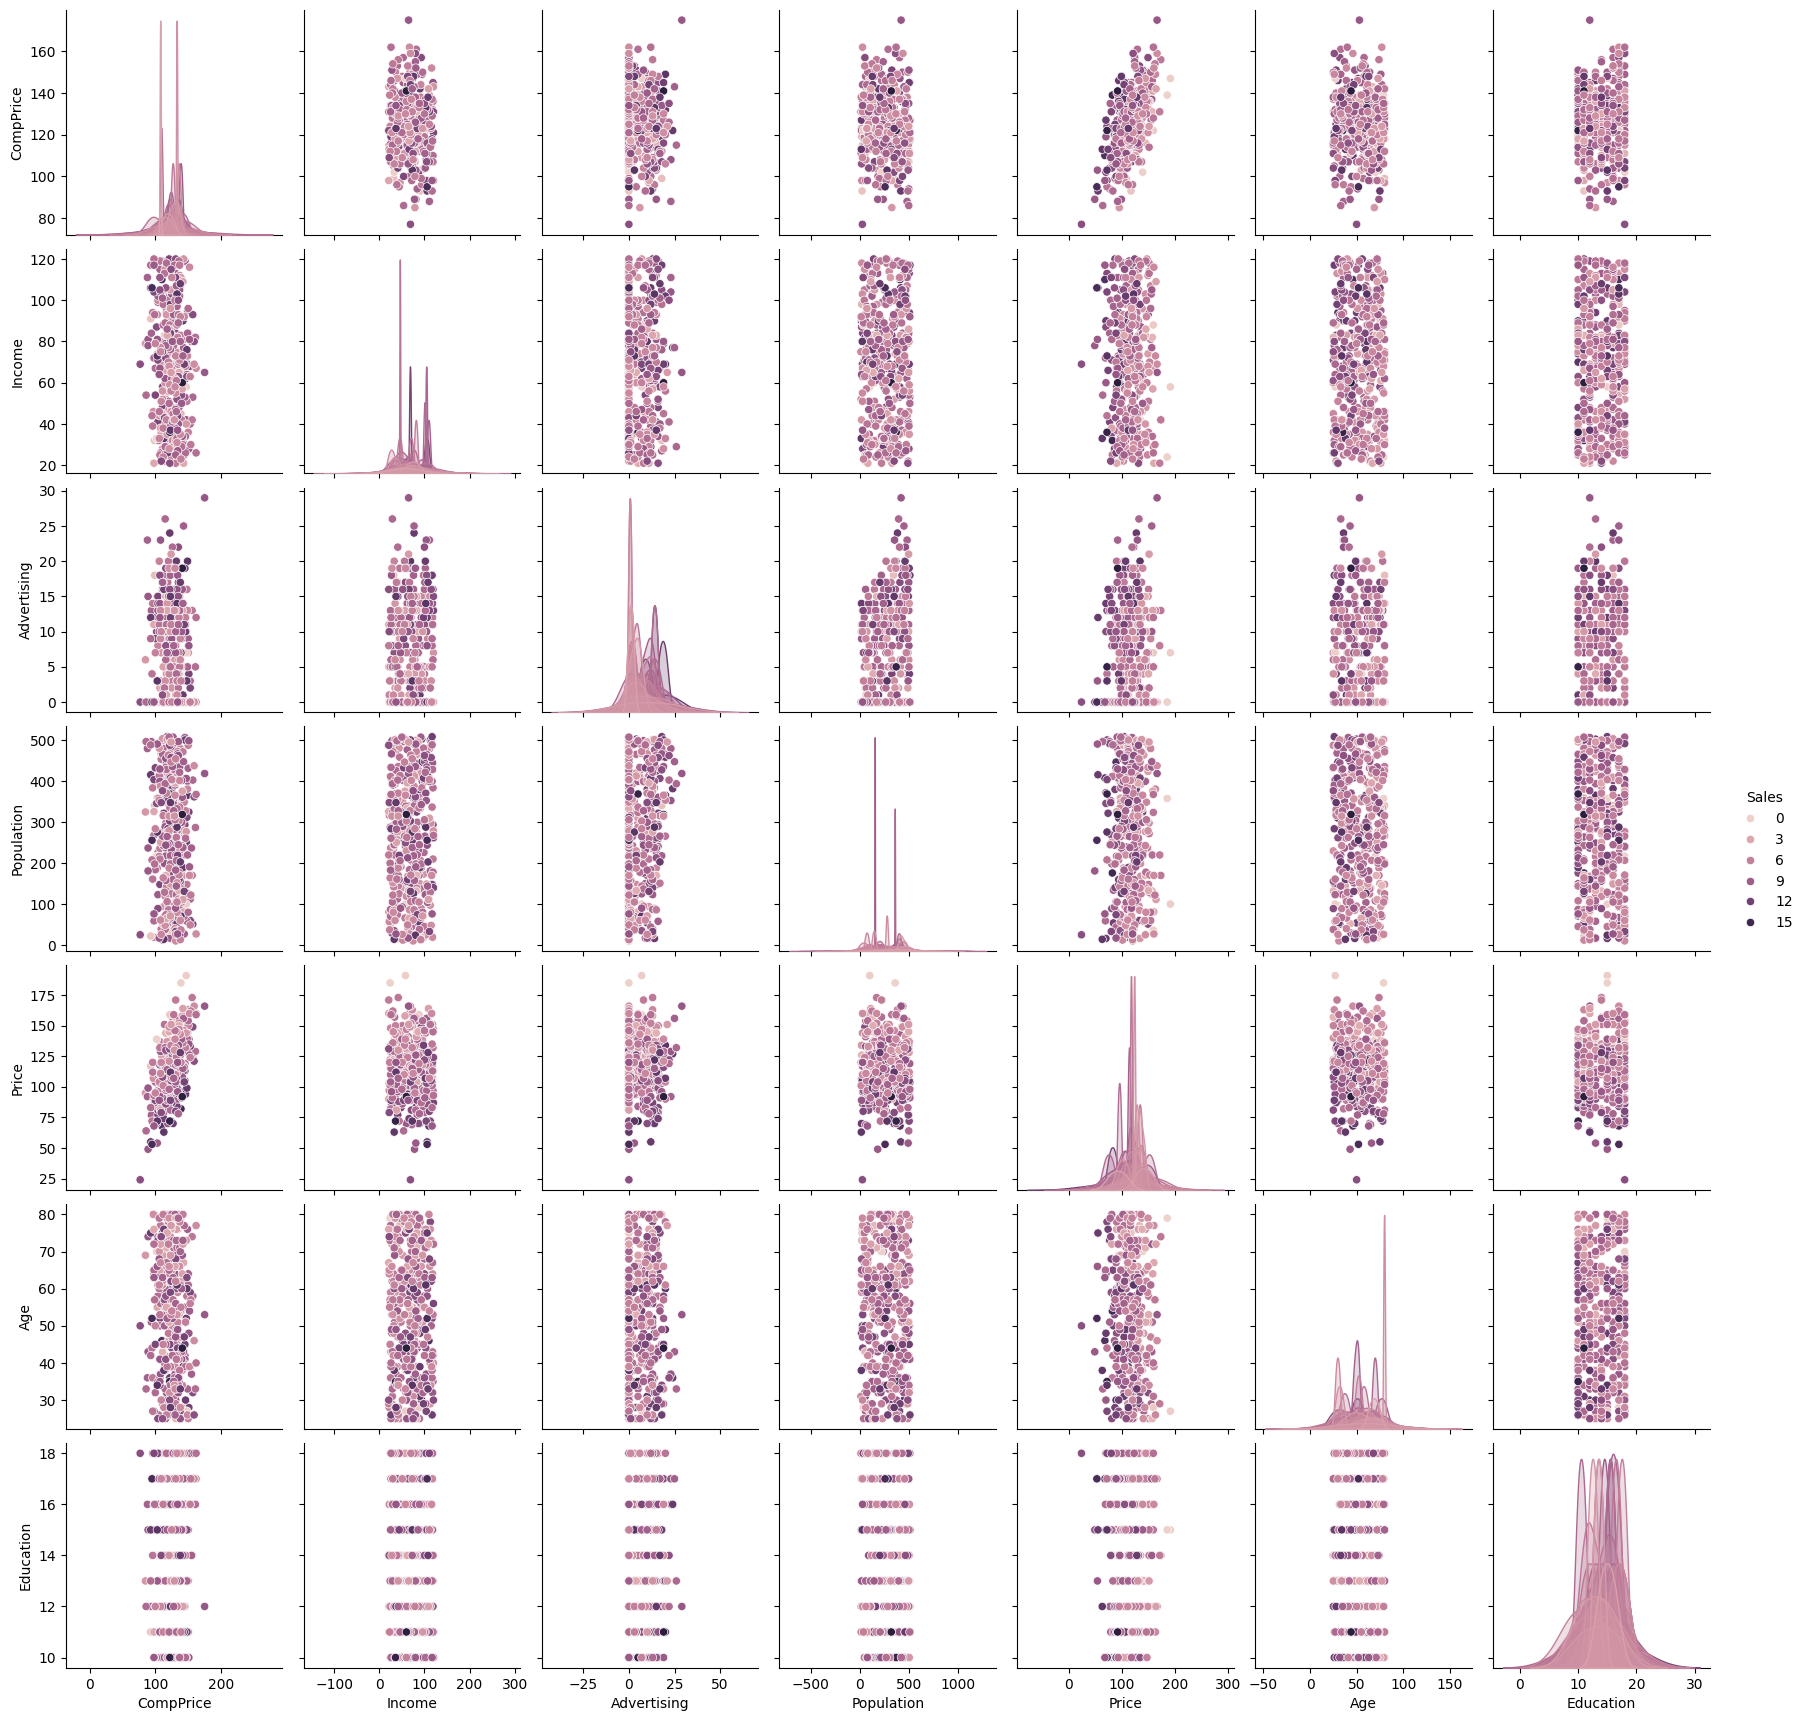

In [77]:
sns.pairplot(data=cdata,hue="Sales")
plt.show()

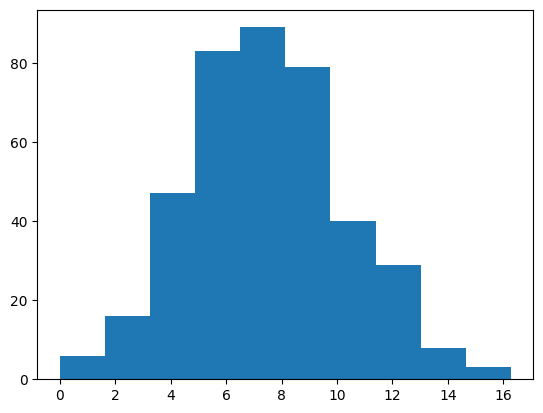

In [78]:
plt.hist("Sales",data=cdata)
plt.show()

In [79]:
cdata1=pd.get_dummies(cdata,columns=["Urban","US"],drop_first=True)

In [80]:
cdata1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [81]:
cdata1["Sales_CAG"]=pd.cut(x=cdata1["Sales"],bins=[0,5.39,9.32,17],labels=["Low","Medium","High"], right = False)
cdata1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales_CAG
0,9.50,138,73,11,276,120,Bad,42,17,1,1,High
1,11.22,111,48,16,260,83,Good,65,10,1,1,High
2,10.06,113,35,10,269,80,Medium,59,12,1,1,High
3,7.40,117,100,4,466,97,Medium,55,14,1,1,Medium
4,4.15,141,64,3,340,128,Bad,38,13,1,0,Low


In [82]:
cdata1.Sales_CAG.value_counts()

Medium    198
High      102
Low       100
Name: Sales_CAG, dtype: int64

In [83]:
cdata1["Sales_CAG"]=cdata1["Sales_CAG"].map({"Low":1,"Medium":2,"High":3})
X=cdata1.iloc[:,1:6]
Y=cdata1["Sales_CAG"]

In [84]:
cdata1["Sales_CAG"].value_counts()

2    198
3    102
1    100
Name: Sales_CAG, dtype: int64

In [85]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=35)

In [86]:
#Decision Tree Classification using ENTROPY criteria.
cdata_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=3)
cdata_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'x[4] <= 89.5\nentropy = 1.511\nsamples = 268\nvalue = [67, 131, 70]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 91.0\nentropy = 0.896\nsamples = 32\nvalue = [0, 10, 22]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 250.5\nentropy = 0.951\nsamples = 27\nvalue = [0, 10, 17]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [0, 7, 3]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.672\nsamples = 17\nvalue = [0, 3, 14]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 6.5\nentropy = 1.477\nsamples = 236\nvalue = [67, 121, 48]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= 133.5\nentropy = 1.26\nsamples = 124\nvalue = [48, 68, 8]'),
 Text(0.46153846153846156, 0.125, 'entropy = 1.083\nsamples = 78\nvalue = [36, 41, 1]'),
 Text(0.6153846153846154, 0.125, 'entropy = 1.37\nsamples = 46\nvalue = [12, 27, 7]'),
 Text(0.8461538461538461, 0.375, 'x[4] <= 136.5

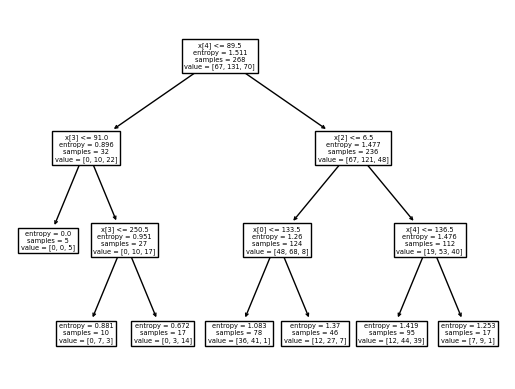

In [87]:
from sklearn import tree
tree.plot_tree(cdata_entropy)

In [88]:
X.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price'], dtype='object')

[Text(0.4230769230769231, 0.875, 'Price <= 89.5\nentropy = 1.511\nsamples = 268\nvalue = [67, 131, 70]\nclass = 2'),
 Text(0.15384615384615385, 0.625, 'Population <= 91.0\nentropy = 0.896\nsamples = 32\nvalue = [0, 10, 22]\nclass = 3'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = 3'),
 Text(0.23076923076923078, 0.375, 'Population <= 250.5\nentropy = 0.951\nsamples = 27\nvalue = [0, 10, 17]\nclass = 3'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [0, 7, 3]\nclass = 2'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.672\nsamples = 17\nvalue = [0, 3, 14]\nclass = 3'),
 Text(0.6923076923076923, 0.625, 'Advertising <= 6.5\nentropy = 1.477\nsamples = 236\nvalue = [67, 121, 48]\nclass = 2'),
 Text(0.5384615384615384, 0.375, 'CompPrice <= 133.5\nentropy = 1.26\nsamples = 124\nvalue = [48, 68, 8]\nclass = 2'),
 Text(0.46153846153846156, 0.125, 'entropy = 1.083\nsamples = 78\nvalue = [36, 41, 1]\nclass = 2'),
 Text(0.61

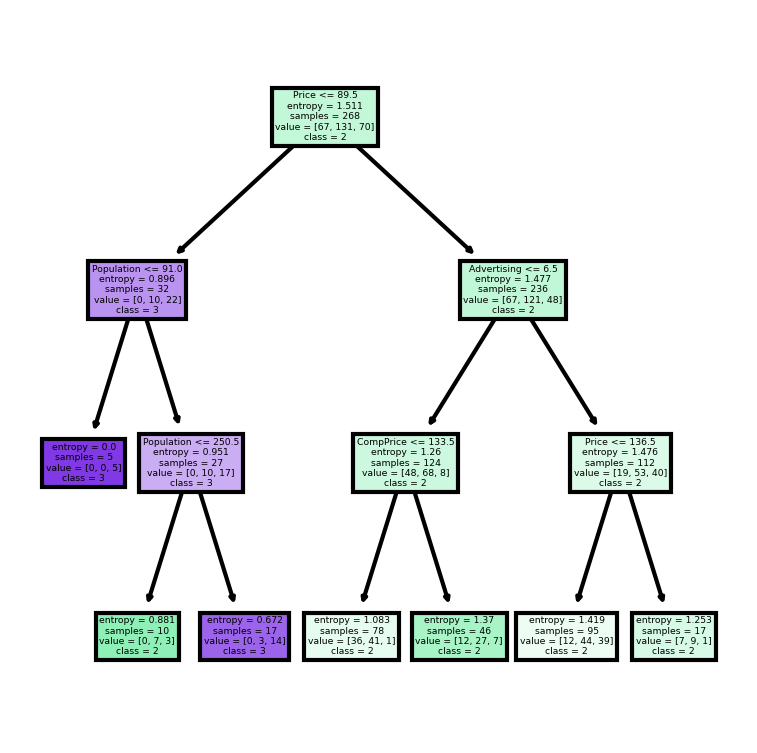

In [89]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price']
cn=["1","2","3"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(cdata_entropy,feature_names=fn,class_names=cn,filled=True)

In [90]:
pred=cdata_entropy.predict(x_test)
pred

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
pd.crosstab(y_test,pred)

col_0,2,3
Sales_CAG,,
1,32,1
2,63,4
3,22,10


In [92]:
#Accuracy
print(np.round(np.mean(pred==y_test),1)*100,"%")

60.0 %


In [43]:
#Decision Tree Classification using GINI criteria.
cdata_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)
cdata_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
gpred=cdata_gini.predict(x_test)
gpred

array([2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2])

In [45]:
#Accuracy
print(np.round(np.mean(gpred==y_test),1)*100,"%")

50.0 %


In [46]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array=cdata1.values
X=array[:,1:4]
Y=array[:,4]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=40)

In [47]:
cdata_regression=DecisionTreeRegressor()
cdata_regression.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
cdata_regression.score(x_test,y_test)

-0.8479075273209411

In [104]:
cdata2=pd.concat([cdata1.iloc[:,1:6],cdata1.iloc[:,-1]],axis=1)
cdata2.head()

,CompPrice,Income,Advertising,Population,Price,Sales_CAG
0,138,73,11,276,120,3
1,111,48,16,260,83,3
2,113,35,10,269,80,3
3,117,100,4,466,97,2
4,141,64,3,340,128,1


In [114]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
array=cdata2.values
X=array[:,:5]
Y=array[:,5]
kf=KFold(n_splits=20,random_state=24,shuffle=True)
rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=5,max_features="log2")
result=cross_val_score(rf,X,Y,cv=kf)
print(result,np.round(result.mean(),1)*100,"%")

[0.6  0.4  0.5  0.7  0.55 0.55 0.65 0.4  0.55 0.65 0.45 0.5  0.7  0.6
 0.5  0.65 0.65 0.6  0.45 0.55] 60.0 %


In [115]:
from sklearn.model_selection import GridSearchCV
rf2=RandomForestClassifier(random_state=52,n_jobs=-1)
param={"n_estimators":[100,200,300],
       "max_depth":[10,20,None],
       "min_samples_leaf":[5,10,15],
       "max_features":["log2","sqrt",None]}
gs=GridSearchCV(estimator=rf2,param_grid=param,cv=5,n_jobs=-1,verbose=200,scoring="accuracy")
gs.fit(X,Y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=52),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=200)

In [116]:
print(gs.best_score_,gs.best_params_,gs.best_estimator_)

0.5875 {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 15, 'n_estimators': 200} RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=15,
                       n_estimators=200, n_jobs=-1, random_state=52)


In [117]:
rf.fit(X,Y)
print(rf.feature_importances_)

[0.14263228 0.11065467 0.19566328 0.16456662 0.38648315]


In [119]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=200,random_state=24)
acv=cross_val_score(ab,X,Y,cv=kf)
print(acv,np.round(acv.mean(),1)*100,"%")

[0.65 0.45 0.4  0.4  0.65 0.45 0.8  0.5  0.4  0.6  0.45 0.5  0.6  0.65
 0.3  0.5  0.6  0.65 0.5  0.5 ] 50.0 %


In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators=[]
m1=LogisticRegression(max_iter=800)
estimators.append(("LRegression",m1))
m2=SVC()
estimators.append(("SVM",m2))
m3=DecisionTreeClassifier()
estimators.append(("DTClassifier",m3))

In [129]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators)
vcv=cross_val_score(vc,X,Y,cv=kf)
print(vcv,np.round(vcv.mean(),1)*100,"%")

[0.6  0.55 0.7  0.65 0.5  0.5  0.5  0.4  0.45 0.65 0.4  0.55 0.6  0.45
 0.6  0.7  0.6  0.75 0.5  0.6 ] 60.0 %


In [130]:
from sklearn.ensemble import StackingClassifier
sc=StackingClassifier(estimators)
scv=cross_val_score(sc,X,Y,cv=kf)
print(scv,np.round(scv.mean(),1)*100,"%")

[0.65 0.45 0.75 0.65 0.6  0.5  0.7  0.45 0.6  0.7  0.5  0.65 0.7  0.5
 0.7  0.7  0.7  0.55 0.6  0.65] 60.0 %


In [131]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [132]:
clf=SVC()
parameter=[{"kernel":["linear","rbf"],"gamma":[0.1,0.2,0.3],"C":[0.01,0.2,1]}]
rf=RandomizedSearchCV(clf,parameter,cv=5,verbose=200)
rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.2, gamma=0.3, kernel=rbf...............................
[CV 1/5; 1/10] END C=0.2, gamma=0.3, kernel=rbf;, score=0.518 total time=   0.0s
[CV 2/5; 1/10] START C=0.2, gamma=0.3, kernel=rbf...............................
[CV 2/5; 1/10] END C=0.2, gamma=0.3, kernel=rbf;, score=0.518 total time=   0.0s
[CV 3/5; 1/10] START C=0.2, gamma=0.3, kernel=rbf...............................
[CV 3/5; 1/10] END C=0.2, gamma=0.3, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5; 1/10] START C=0.2, gamma=0.3, kernel=rbf...............................
[CV 4/5; 1/10] END C=0.2, gamma=0.3, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5; 1/10] START C=0.2, gamma=0.3, kernel=rbf...............................
[CV 5/5; 1/10] END C=0.2, gamma=0.3, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5; 2/10] START C=0.01, gamma=0.3, kernel=linear...........................
[CV 1/5; 2/10] END C=0.01, gamma=0.3, kernel=lin

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': [0.01, 0.2, 1],
                                         'gamma': [0.1, 0.2, 0.3],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=200)

In [133]:
print(rf.best_params_,rf.best_estimator_,rf.best_score_)

{'kernel': 'linear', 'gamma': 0.3, 'C': 0.01} SVC(C=0.01, gamma=0.3, kernel='linear') 0.5785714285714285


In [135]:
ckf=SVC(kernel="rbf",gamma=0.05)
ckf.fit(X,Y)
y_pred=ckf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("accuracy score =",accuracy_score(y_pred,y_test))
print("confusion matrix =",confusion_matrix(y_pred,y_test))

accuracy score = 1.0
confusion matrix = [[35  0  0]
 [ 0 56  0]
 [ 0  0 29]]


In [136]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        56
           3       1.00      1.00      1.00        29

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**Inference: We can go with Decision Tree ENTROPY algorithm as it provides higher accuracy**